<h1>Tackling an open problem</h1>

For this homework the idea is to hone our skills on exploring and plotting a dataset. You can either work with the Pokemon dataset that was given or download your own. If you opt to download your own I recommend you use one of the datasets available on kaggle,

https://www.kaggle.com/datasets

As they tend to be found in a clean format and are generally free to use.

Largely, the main objective is learning how to search the internet for new implementations you want to use on your code helping you develop your self-confidence.

There's no right or wrong, pick a dataset you enjoy and try to have some fun.
If you need, use the notebook from the previous session as a guideline.


In [56]:
# Importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [57]:
#Importing a CSV file as a dataframe and complete a quick check of the data
pokemon_df = pd.read_csv('../Datasets/Pokemon.csv', sep=',')
pokemon_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [58]:
#Create new dataframe with only unique IDs and check
UniquePokemon_df = pokemon_df.drop_duplicates(subset=['#'])
UniquePokemon_df["Generation"].value_counts(sort=False)

Generation
1    151
2    100
3    135
4    107
5    156
6     72
Name: count, dtype: int64

In [59]:
#List all Mega Evolutions
pokemon_df[pokemon_df["Name"].str.contains("Mega")]
#Space after "Mega" added to ignore "Meganium"
pokemon_df[pokemon_df["Name"].str.contains("Mega ")]

UniquePokemon_df["Has Mega"] = pokemon_df["#"].isin(pokemon_df[pokemon_df["Name"].str.contains("Mega ")]["#"])

print(UniquePokemon_df)

       #                 Name   Type 1  Type 2  Total   HP  Attack  Defense  \
0      1            Bulbasaur    Grass  Poison    318   45      49       49   
1      2              Ivysaur    Grass  Poison    405   60      62       63   
2      3             Venusaur    Grass  Poison    525   80      82       83   
4      4           Charmander     Fire     NaN    309   39      52       43   
5      5           Charmeleon     Fire     NaN    405   58      64       58   
..   ...                  ...      ...     ...    ...  ...     ...      ...   
793  717              Yveltal     Dark  Flying    680  126     131       95   
794  718     Zygarde50% Forme   Dragon  Ground    600  108     100      121   
795  719              Diancie     Rock   Fairy    600   50     100      150   
797  720  HoopaHoopa Confined  Psychic   Ghost    600   80     110       60   
799  721            Volcanion     Fire   Water    600   80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary

C:\Users\TomAH\AppData\Local\Temp\ipykernel_736\3019766275.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UniquePokemon_df["Has Mega"] = pokemon_df["#"].isin(pokemon_df[pokemon_df["Name"].str.contains("Mega ")]["#"])


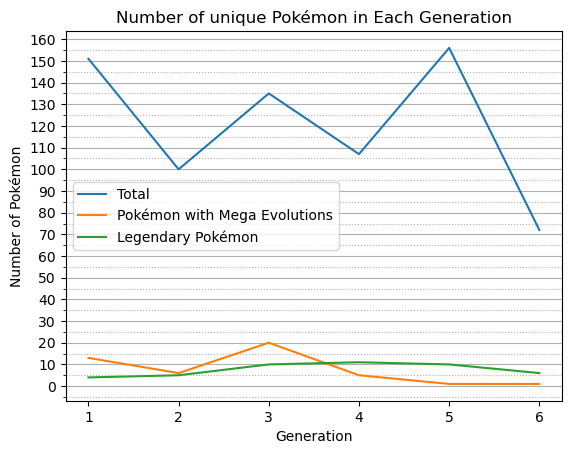

In [60]:
TotalInGen = UniquePokemon_df["Generation"].value_counts(sort=False)
MegaInGen = UniquePokemon_df[(UniquePokemon_df["Has Mega"] == True)]["Generation"].value_counts(sort=False)
LegInGen = UniquePokemon_df[(UniquePokemon_df["Legendary"] == True)]["Generation"].value_counts(sort=False)
TotalUniqueInGen = UniquePokemon_df["Generation"].value_counts(sort=False)

import matplotlib.ticker as ticker
fig, ax = plt.subplots()
ax.plot(TotalInGen, label="Total")
ax.plot(MegaInGen, label="Pokémon with Mega Evolutions")
ax.plot(LegInGen, label="Legendary Pokémon")


ax.set_title("Number of unique Pokémon in Each Generation")
ax.set_ylabel("Number of Pokémon")
ax.set_xlabel("Generation")
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))
ax.legend()
ax.yaxis.grid(which = "major", linestyle="solid")
ax.yaxis.grid(which = "minor", linestyle="dotted")